# Yolo v9
In this notebook you will learn how to use Yolo v9 model for object detection

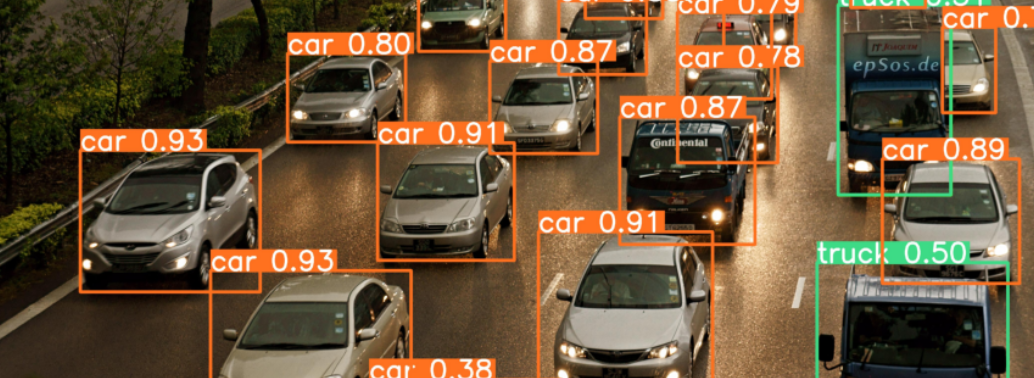

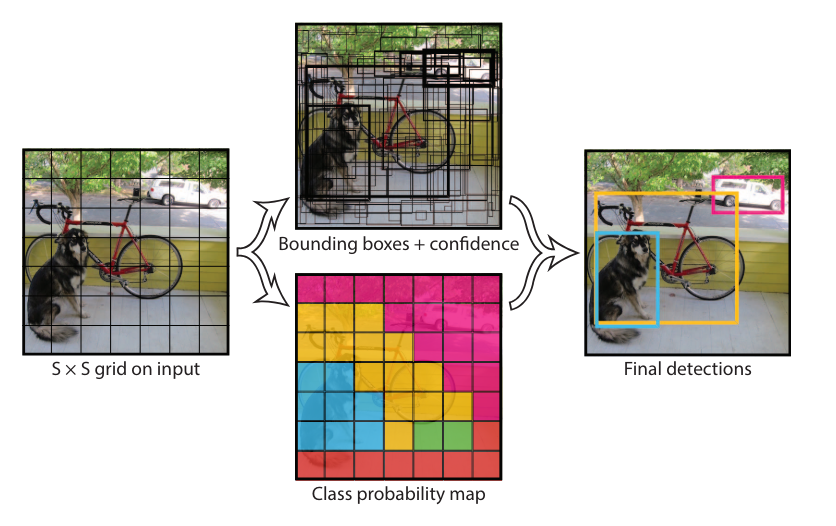

Source: original paper https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Redmon_You_Only_Look_CVPR_2016_paper.pdf

In [1]:
# import libraries
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# ref: https://github.com/ultralytics/ultralytics
from ultralytics import YOLO

In [3]:
# Build a YOLOv9c model from pretrained weight
# Full model description: https://docs.ultralytics.com/models/yolov9/
model = YOLO('yolov9c.pt')

# Display model information (optional)
model.info()

YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs


(618, 25590912, 0, 104.02268160000003)

In [4]:
# test image for object detection: https://en.wikipedia.org/wiki/File:Driving_Cars_in_a_Traffic_Jam.jpg
image_path = 'test_image.jpg'

In [5]:
# This can be used if you want to retrain the model
# results = model.train(data='coco8.yaml', epochs=100, imgsz=640)

# Run inference with the YOLOv9c model on the specified image
results = model(image_path)


image 1/1 C:\Users\degas\Documents\Github\YouTube\Deep_learning\test_image.jpg: 448x640 29 cars, 3 buss, 5 trucks, 653.1ms
Speed: 15.6ms preprocess, 653.1ms inference, 2514.4ms postprocess per image at shape (1, 3, 448, 640)


In [6]:
# The output of the inference is a ultralytics.engine.results.Results object with attributes:
# boxes (Boxes): Object containing detection bounding boxes
# keypoints (Keypoints): Object containing detected keypoints for each object.
# masks (Masks): Object containing detection masks.
# names: all existing objects that can be potentially detected by the model
# obb (torch.tensor): A 2D tensor of oriented bounding box coordinates for each detection.
# orig_img (numpy.ndarray): Original image as a numpy array
# orig_shape (tuple): Original image shape in (height, width) format
# path (str): Path to the image file.
# probs (Probs): Object containing class probabilities for classification tasks
# save_dir (str): Directory where to save the results
# speed: information about the processing

# Note: as you will observe for detection tasks as the one we're doing right now some fields are set to None
# because used for classification and segmentation tasks

# Let's have a look to the result object
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [7]:
# default plot
im_array = results[0].plot()  # Get a BGR numpy array of predictions
prediction_image = 'results.jpg'
im = Image.fromarray(im_array[..., ::-1])  # Convert to RGB PIL image
im.show()  # Show the image on a separate window
im.save(prediction_image)  # Save the image

In [8]:
# show predicted boxes in the notebook
# it will show each predicted object and with which probability going from 0 to 1 (with 1=100% probability)

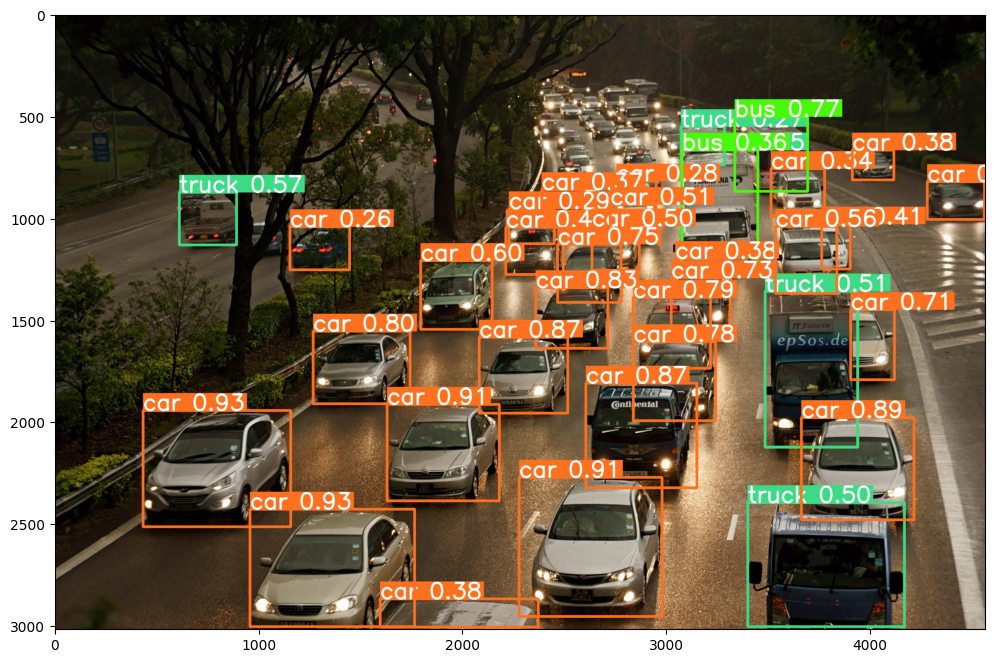

In [20]:
# Create figure
plt.figure(figsize=(12, 8))

# Plot result in the notebook
img = Image.open(prediction_image)

# Display the image
plt.imshow(img)

In [18]:
# In this cell we're going to see how to do custom plotting of the Yolo results
def plot_results(image_path, results, score_threshold=0):
    '''
    image_path (str): path to the image
    results (yolo results object): results of the yolo model
    score_threshold (score_threshold): confidence threshold i.e. consider only detected object with score > 0
    '''
    # Open the image using PIL (Pillow)
    img = Image.open(image_path)

    # Create a larger figure with a specific size (e.g., 12x8 inches)
    plt.figure(figsize=(12, 8))

    # Display the image
    plt.imshow(img)
    
    for result in results:
        boxes = results[0].boxes.xyxy
        scores = results[0].boxes.conf
        classes = results[0].boxes.cls
        names = results[0].names

        # Add bounding boxes with labels
        for box, score, label in zip(boxes, scores, classes.numpy()):
            if score < score_threshold:
                continue
            x_min, y_min, x_max, y_max = box
            box_width = x_max - x_min
            box_height = y_max - y_min

            # Create a rectangle patch
            bbox = patches.Rectangle((x_min, y_min), box_width, box_height, 
                                     linewidth=2, edgecolor='r', facecolor='none')

            # Add the patch to the plot
            plt.gca().add_patch(bbox)
            
            # Add label
            plt.text(x_min, y_min, f'{names[label]} {score:.2f}', 
                     bbox=dict(facecolor='red', alpha=0.5))

    # Show the plot
    plt.show()

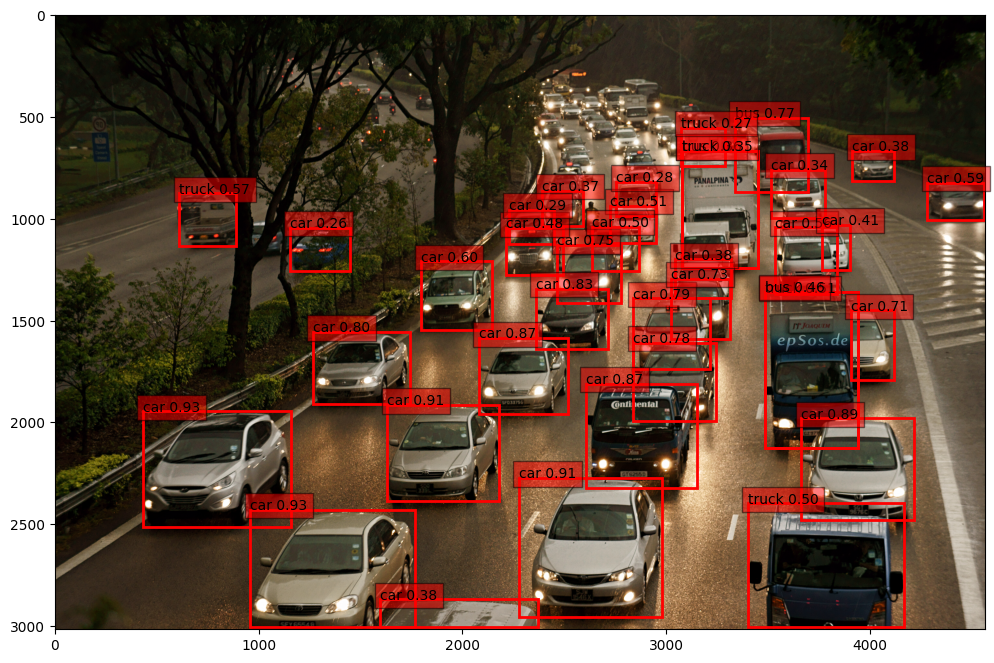

In [19]:
plot_results(image_path, results)